In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as pl
import keras

Using TensorFlow backend.


In [2]:
data=[[[(i+j)/100] for i in range(5)] for j in range(100)]
target=[(i+5)/100 for i in range(100)]

In [3]:
target[:10]

[0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14]

In [4]:
data[:10]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]]]

In [5]:
data=np.array(data,dtype='float32')
target=np.array(target,dtype='float32')

In [6]:
data[:4]

array([[[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]],

       [[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]],

       [[0.02],
        [0.03],
        [0.04],
        [0.05],
        [0.06]],

       [[0.03],
        [0.04],
        [0.05],
        [0.06],
        [0.07]]], dtype=float32)

In [7]:
data.shape

(100, 5, 1)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2,
                                              random_state=4)

In [9]:
# from keras.utils import to_categorical
# y_test = to_categorical(y_test)
# y_train=to_categorical(y_train)

In [10]:
model=Sequential()
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
model.add(LSTM((1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 12        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [11]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500)

Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 0.5774 - accuracy: 0.0000e+00 - val_loss: 0.4634 - val_accuracy: 0.0000e+00
Epoch 2/500
80/80 [==============================] - 0s 486us/step - loss: 0.5740 - accuracy: 0.0000e+00 - val_loss: 0.4600 - val_accuracy: 0.0000e+00
Epoch 3/500
80/80 [==============================] - 0s 486us/step - loss: 0.5707 - accuracy: 0.0000e+00 - val_loss: 0.4567 - val_accuracy: 0.0000e+00
Epoch 4/500
80/80 [==============================] - 0s 492us/step - loss: 0.5674 - accuracy: 0.0000e+00 - val_loss: 0.4534 - val_accuracy: 0.0000e+00
Epoch 5/500
80/80 [==============================] - 0s 524us/step - loss: 0.5641 - accuracy: 0.0000e+00 - val_loss: 0.4501 - val_accuracy: 0.0000e+00
Epoch 6/500
80/80 [==============================] - 0s 498us/step - loss: 0.5608 - accuracy: 0.0000e+00 - val_loss: 0.4467 - val_accuracy: 0.0000e+00
Epoch 7/500
80/80 [==============================] 

Epoch 55/500
80/80 [==============================] - 0s 598us/step - loss: 0.3375 - accuracy: 0.0000e+00 - val_loss: 0.2386 - val_accuracy: 0.0000e+00
Epoch 56/500
80/80 [==============================] - 0s 598us/step - loss: 0.3326 - accuracy: 0.0000e+00 - val_loss: 0.2367 - val_accuracy: 0.0000e+00
Epoch 57/500
80/80 [==============================] - 0s 599us/step - loss: 0.3279 - accuracy: 0.0000e+00 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 58/500
80/80 [==============================] - 0s 525us/step - loss: 0.3235 - accuracy: 0.0000e+00 - val_loss: 0.2332 - val_accuracy: 0.0000e+00
Epoch 59/500
80/80 [==============================] - 0s 513us/step - loss: 0.3190 - accuracy: 0.0000e+00 - val_loss: 0.2322 - val_accuracy: 0.0000e+00
Epoch 60/500
80/80 [==============================] - 0s 494us/step - loss: 0.3144 - accuracy: 0.0000e+00 - val_loss: 0.2312 - val_accuracy: 0.0000e+00
Epoch 61/500
80/80 [==============================] - 0s 536us/step - loss: 0.3108 - acc

80/80 [==============================] - 0s 486us/step - loss: 0.2440 - accuracy: 0.0000e+00 - val_loss: 0.2634 - val_accuracy: 0.0500
Epoch 110/500
80/80 [==============================] - 0s 611us/step - loss: 0.2436 - accuracy: 0.0000e+00 - val_loss: 0.2639 - val_accuracy: 0.0500
Epoch 111/500
80/80 [==============================] - 0s 486us/step - loss: 0.2432 - accuracy: 0.0000e+00 - val_loss: 0.2643 - val_accuracy: 0.0500
Epoch 112/500
80/80 [==============================] - 0s 486us/step - loss: 0.2429 - accuracy: 0.0000e+00 - val_loss: 0.2650 - val_accuracy: 0.0500
Epoch 113/500
80/80 [==============================] - 0s 486us/step - loss: 0.2425 - accuracy: 0.0000e+00 - val_loss: 0.2656 - val_accuracy: 0.0500
Epoch 114/500
80/80 [==============================] - 0s 499us/step - loss: 0.2422 - accuracy: 0.0000e+00 - val_loss: 0.2661 - val_accuracy: 0.0500
Epoch 115/500
80/80 [==============================] - 0s 486us/step - loss: 0.2418 - accuracy: 0.0000e+00 - val_loss: 0

80/80 [==============================] - 0s 710us/step - loss: 0.2237 - accuracy: 0.0000e+00 - val_loss: 0.2518 - val_accuracy: 0.0500
Epoch 165/500
80/80 [==============================] - 0s 699us/step - loss: 0.2232 - accuracy: 0.0000e+00 - val_loss: 0.2512 - val_accuracy: 0.0500
Epoch 166/500
80/80 [==============================] - 0s 698us/step - loss: 0.2227 - accuracy: 0.0000e+00 - val_loss: 0.2506 - val_accuracy: 0.0500
Epoch 167/500
80/80 [==============================] - 0s 673us/step - loss: 0.2222 - accuracy: 0.0000e+00 - val_loss: 0.2501 - val_accuracy: 0.0500
Epoch 168/500
80/80 [==============================] - 0s 667us/step - loss: 0.2216 - accuracy: 0.0000e+00 - val_loss: 0.2498 - val_accuracy: 0.0500
Epoch 169/500
80/80 [==============================] - 0s 661us/step - loss: 0.2211 - accuracy: 0.0000e+00 - val_loss: 0.2493 - val_accuracy: 0.0500
Epoch 170/500
80/80 [==============================] - 0s 698us/step - loss: 0.2206 - accuracy: 0.0000e+00 - val_loss: 0

80/80 [==============================] - 0s 623us/step - loss: 0.1798 - accuracy: 0.0000e+00 - val_loss: 0.1912 - val_accuracy: 0.0500
Epoch 220/500
80/80 [==============================] - 0s 636us/step - loss: 0.1786 - accuracy: 0.0000e+00 - val_loss: 0.1895 - val_accuracy: 0.0500
Epoch 221/500
80/80 [==============================] - 0s 626us/step - loss: 0.1772 - accuracy: 0.0000e+00 - val_loss: 0.1885 - val_accuracy: 0.0500
Epoch 222/500
80/80 [==============================] - 0s 679us/step - loss: 0.1759 - accuracy: 0.0000e+00 - val_loss: 0.1873 - val_accuracy: 0.0500
Epoch 223/500
80/80 [==============================] - 0s 648us/step - loss: 0.1745 - accuracy: 0.0000e+00 - val_loss: 0.1851 - val_accuracy: 0.0500
Epoch 224/500
80/80 [==============================] - 0s 623us/step - loss: 0.1730 - accuracy: 0.0000e+00 - val_loss: 0.1820 - val_accuracy: 0.0500
Epoch 225/500
80/80 [==============================] - 0s 648us/step - loss: 0.1716 - accuracy: 0.0000e+00 - val_loss: 0

80/80 [==============================] - 0s 673us/step - loss: 0.0516 - accuracy: 0.0000e+00 - val_loss: 0.0452 - val_accuracy: 0.0500
Epoch 275/500
80/80 [==============================] - 0s 661us/step - loss: 0.0504 - accuracy: 0.0000e+00 - val_loss: 0.0427 - val_accuracy: 0.0500
Epoch 276/500
80/80 [==============================] - 0s 661us/step - loss: 0.0486 - accuracy: 0.0000e+00 - val_loss: 0.0416 - val_accuracy: 0.0500
Epoch 277/500
80/80 [==============================] - 0s 697us/step - loss: 0.0480 - accuracy: 0.0000e+00 - val_loss: 0.0414 - val_accuracy: 0.0500
Epoch 278/500
80/80 [==============================] - 0s 673us/step - loss: 0.0473 - accuracy: 0.0000e+00 - val_loss: 0.0415 - val_accuracy: 0.0500
Epoch 279/500
80/80 [==============================] - 0s 685us/step - loss: 0.0464 - accuracy: 0.0000e+00 - val_loss: 0.0420 - val_accuracy: 0.0500
Epoch 280/500
80/80 [==============================] - 0s 651us/step - loss: 0.0457 - accuracy: 0.0000e+00 - val_loss: 0

80/80 [==============================] - 0s 648us/step - loss: 0.0406 - accuracy: 0.0000e+00 - val_loss: 0.0416 - val_accuracy: 0.0500
Epoch 330/500
80/80 [==============================] - 0s 636us/step - loss: 0.0407 - accuracy: 0.0000e+00 - val_loss: 0.0414 - val_accuracy: 0.0500
Epoch 331/500
80/80 [==============================] - 0s 661us/step - loss: 0.0406 - accuracy: 0.0000e+00 - val_loss: 0.0413 - val_accuracy: 0.0500
Epoch 332/500
80/80 [==============================] - 0s 686us/step - loss: 0.0406 - accuracy: 0.0000e+00 - val_loss: 0.0414 - val_accuracy: 0.0500
Epoch 333/500
80/80 [==============================] - 0s 698us/step - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0.0413 - val_accuracy: 0.0500
Epoch 334/500
80/80 [==============================] - 0s 680us/step - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0.0412 - val_accuracy: 0.0500
Epoch 335/500
80/80 [==============================] - 0s 701us/step - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0

80/80 [==============================] - 0s 673us/step - loss: 0.0379 - accuracy: 0.0000e+00 - val_loss: 0.0401 - val_accuracy: 0.0500
Epoch 385/500
80/80 [==============================] - 0s 699us/step - loss: 0.0380 - accuracy: 0.0000e+00 - val_loss: 0.0401 - val_accuracy: 0.0500
Epoch 386/500
80/80 [==============================] - 0s 672us/step - loss: 0.0380 - accuracy: 0.0000e+00 - val_loss: 0.0402 - val_accuracy: 0.0500
Epoch 387/500
80/80 [==============================] - 0s 659us/step - loss: 0.0379 - accuracy: 0.0000e+00 - val_loss: 0.0398 - val_accuracy: 0.0500
Epoch 388/500
80/80 [==============================] - 0s 648us/step - loss: 0.0380 - accuracy: 0.0000e+00 - val_loss: 0.0387 - val_accuracy: 0.0500
Epoch 389/500
80/80 [==============================] - 0s 648us/step - loss: 0.0378 - accuracy: 0.0000e+00 - val_loss: 0.0386 - val_accuracy: 0.0500
Epoch 390/500
80/80 [==============================] - 0s 698us/step - loss: 0.0377 - accuracy: 0.0000e+00 - val_loss: 0

80/80 [==============================] - 0s 736us/step - loss: 0.0358 - accuracy: 0.0000e+00 - val_loss: 0.0371 - val_accuracy: 0.0500
Epoch 440/500
80/80 [==============================] - 0s 685us/step - loss: 0.0363 - accuracy: 0.0000e+00 - val_loss: 0.0371 - val_accuracy: 0.0500
Epoch 441/500
80/80 [==============================] - 0s 661us/step - loss: 0.0362 - accuracy: 0.0000e+00 - val_loss: 0.0370 - val_accuracy: 0.0500
Epoch 442/500
80/80 [==============================] - 0s 711us/step - loss: 0.0360 - accuracy: 0.0000e+00 - val_loss: 0.0371 - val_accuracy: 0.0500
Epoch 443/500
80/80 [==============================] - 0s 636us/step - loss: 0.0358 - accuracy: 0.0000e+00 - val_loss: 0.0370 - val_accuracy: 0.0500
Epoch 444/500
80/80 [==============================] - 0s 648us/step - loss: 0.0358 - accuracy: 0.0000e+00 - val_loss: 0.0371 - val_accuracy: 0.0500
Epoch 445/500
80/80 [==============================] - 0s 673us/step - loss: 0.0357 - accuracy: 0.0000e+00 - val_loss: 0

80/80 [==============================] - 0s 623us/step - loss: 0.0344 - accuracy: 0.0000e+00 - val_loss: 0.0364 - val_accuracy: 0.0500
Epoch 495/500
80/80 [==============================] - 0s 635us/step - loss: 0.0343 - accuracy: 0.0000e+00 - val_loss: 0.0365 - val_accuracy: 0.0500
Epoch 496/500
80/80 [==============================] - 0s 636us/step - loss: 0.0343 - accuracy: 0.0000e+00 - val_loss: 0.0366 - val_accuracy: 0.0500
Epoch 497/500
80/80 [==============================] - 0s 636us/step - loss: 0.0343 - accuracy: 0.0000e+00 - val_loss: 0.0365 - val_accuracy: 0.0500
Epoch 498/500
80/80 [==============================] - 0s 623us/step - loss: 0.0343 - accuracy: 0.0000e+00 - val_loss: 0.0362 - val_accuracy: 0.0500
Epoch 499/500
80/80 [==============================] - 0s 735us/step - loss: 0.0342 - accuracy: 0.0000e+00 - val_loss: 0.0363 - val_accuracy: 0.0500
Epoch 500/500
80/80 [==============================] - 0s 605us/step - loss: 0.0342 - accuracy: 0.0000e+00 - val_loss: 0

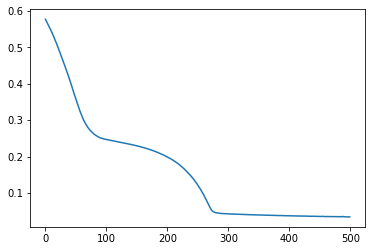

In [12]:
pl.plot(history.history['loss'])

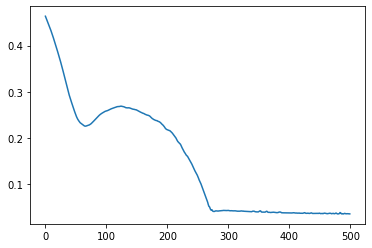

In [19]:
pl.plot(history.history['val_loss'])

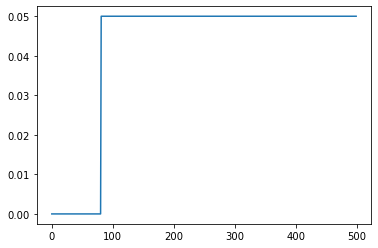

In [20]:
pl.plot(history.history['val_accuracy'])

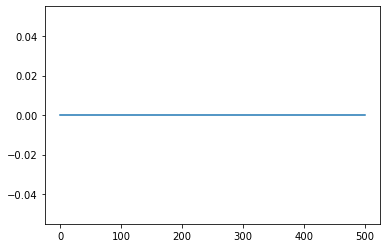

In [21]:
pl.plot(history.history['accuracy'])

In [13]:
results=model.predict(X_test)

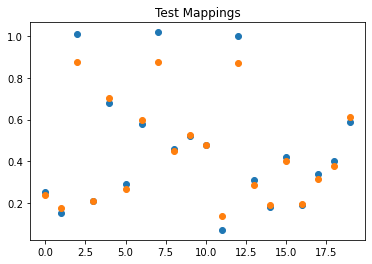

In [14]:
pl.scatter(range(20),y_test)
pl.scatter(range(20),results)
pl.title('Test Mappings')
pl.show()

In [15]:
y_test,np.round(model.predict(X_test),3)

(array([0.25, 0.15, 1.01, 0.21, 0.68, 0.29, 0.58, 1.02, 0.46, 0.52, 0.48,
        0.07, 1.  , 0.31, 0.18, 0.42, 0.19, 0.34, 0.4 , 0.59],
       dtype=float32),
 array([[0.236],
        [0.174],
        [0.876],
        [0.208],
        [0.706],
        [0.268],
        [0.6  ],
        [0.878],
        [0.451],
        [0.526],
        [0.476],
        [0.139],
        [0.874],
        [0.286],
        [0.19 ],
        [0.402],
        [0.196],
        [0.314],
        [0.379],
        [0.612]], dtype=float32))

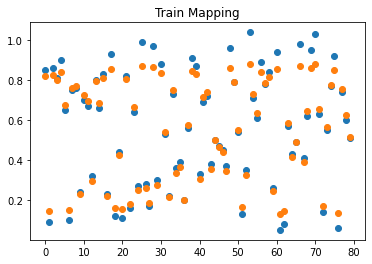

In [16]:
pl.scatter(range(80),y_train)
pl.scatter(range(80),model.predict(X_train))
pl.title("Train Mapping")
pl.show()